#                                            Reverse Image Search

In [1]:
pip install tensorflow --ignore-installed

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached h5py-3.7.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.4 which is incompatible.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.14.1 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 

  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached grpcio-1.50.0-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Using cached google_auth-2.14.1-py2.py3-none-any.whl (175 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached Werkzeug-2.2.2-py3-none-any.whl (232 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)


In [2]:

import os
import numpy as np
from numpy.linalg import norm
from tqdm import tqdm
import os
import PIL
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import math
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

C:\Users\Lenovo\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
img_size =224

model = ResNet50(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')

Create the keras image data generator object and extract the features for the images using Resnet50 predict_generator method.

In [22]:
batch_size = 64
root_dir = "C:/Users/Lenovo/Desktop/AIML Hackathon/101_ObjectCategories"

img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(root_dir,
                                        target_size=(img_size, img_size),
                                        batch_size=batch_size,
                                        class_mode=None,
                                        shuffle=False)

num_images = len(datagen.filenames)
num_epochs = int(math.ceil(num_images / batch_size))

feature_list = model.predict_generator(datagen, num_epochs,verbose = 1)
print(num_epochs)

Found 9144 images belonging to 102 classes.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8460\2582074538.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  feature_list = model.predict_generator(datagen, num_epochs,verbose = 1)


143/143 [==============================] - 421s 3s/step
143


In [5]:
print("Num images   = ", len(datagen.classes))
print("Shape of feature_list = ", feature_list.shape)

Num images   =  9144
Shape of feature_list =  (9144, 2048)


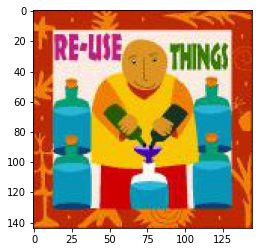

In [6]:
plt.imshow(plt.imread('C:/Users/Lenovo/Desktop/AIML Hackathon/101_ObjectCategories/BACKGROUND_Google/image_0001.jpg'))
plt.show()

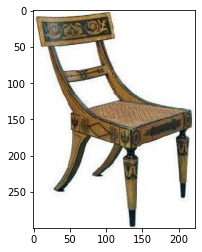

In [7]:
plt.imshow(plt.imread('C:/Users/Lenovo/Desktop/AIML Hackathon/101_ObjectCategories/chair/image_0001.jpg'))
plt.show()

We have 9144 images in our dataset. Each image is converted into a 2048 feature vector.

In [8]:
# Get full path for all the images in our dataset

filenames = [root_dir + '/' + s for s in datagen.filenames]

In [9]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree',
                             metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

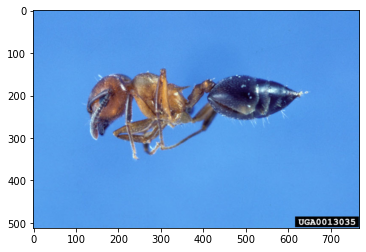

In [10]:
plt.imshow(plt.imread("C:/Users/Lenovo/Desktop/AIML Hackathon/hymenoptera_data/train/ants/0013035.jpg"))
plt.show()

In [11]:
img_path = 'C:/Users/Lenovo/Desktop/AIML Hackathon/hymenoptera_data/train/ants/0013035.jpg'
input_shape = (img_size, img_size, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)


In [12]:
test_img_features = model.predict(preprocessed_img, batch_size=1)

_, indices = neighbors.kneighbors(test_img_features)

1/1 [==============================] - 0s 176ms/step


(1, 5)


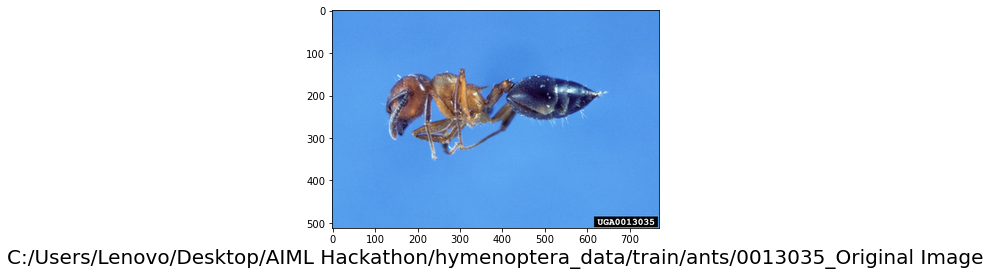

********* Predictions ***********


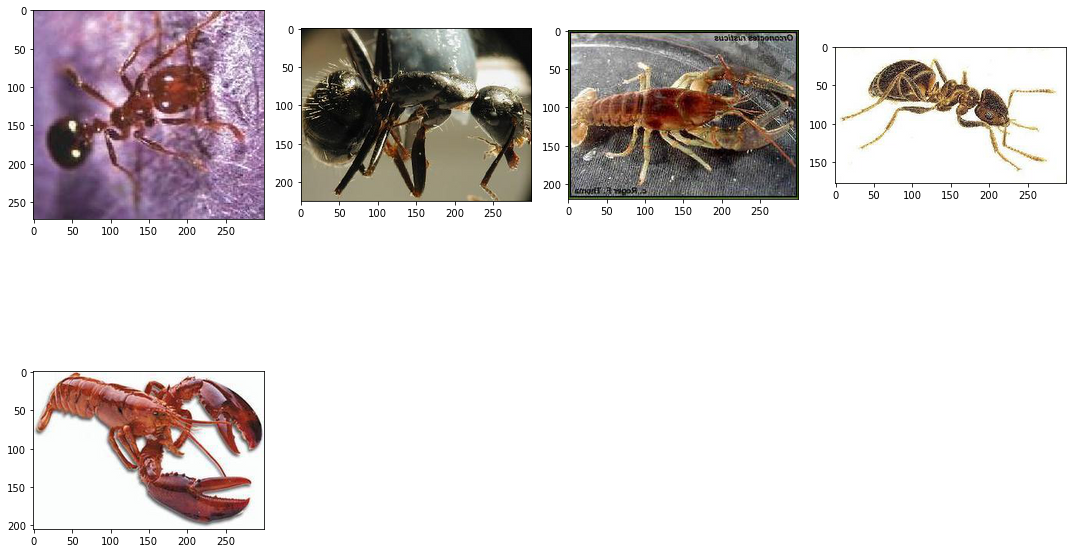

In [13]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

print(indices.shape)

plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions ***********')
similar_images(indices[0])

Here we observe image a of scorpion in the prediction which is incorrect. Due to the large dimensionality of the features, the NearestNeighbors algorithm is not able to cluster similar features accurately.

<br>
To overcome this we will apply PCA to our features and reduce the dimensions and try to find the similar features again.

In [14]:
pca = PCA(n_components=100)
pca.fit(feature_list)
compressed_features = pca.transform(feature_list)

In [15]:
neighbors_pca_features = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree',
                             metric='euclidean').fit(compressed_features)

(1, 5)


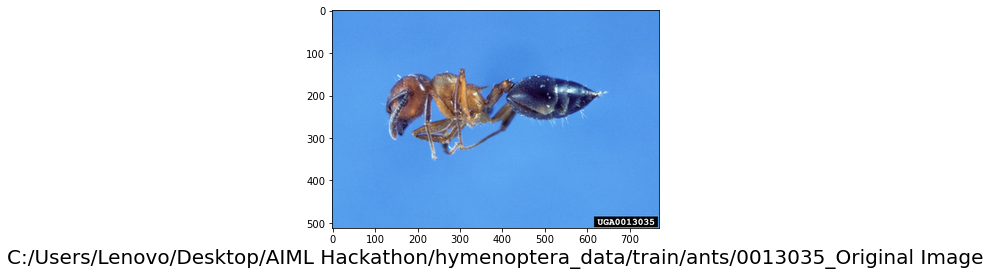

********* Predictions  after PCA ***********


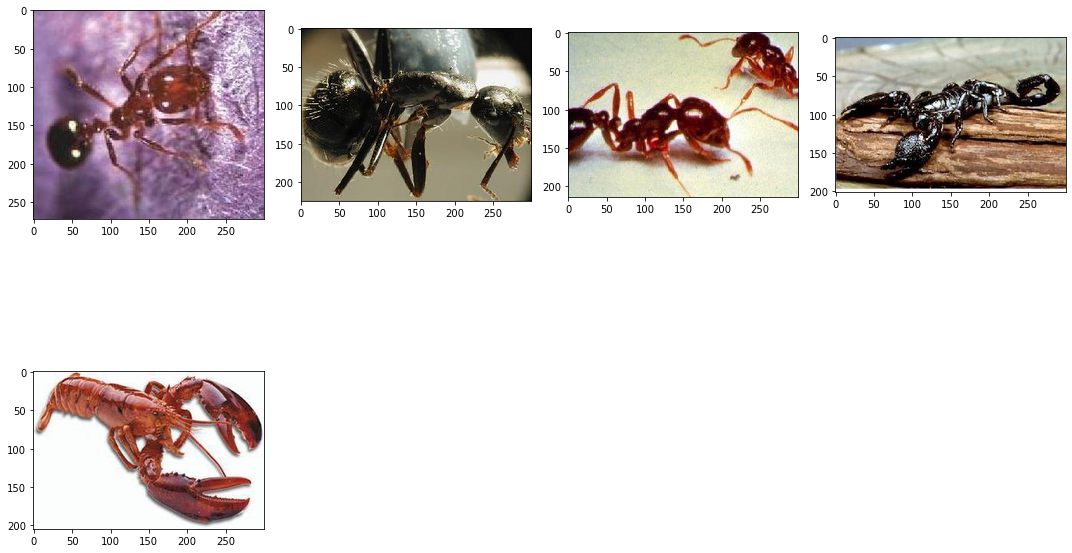

In [16]:
test_img_compressed = pca.transform(test_img_features)
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)
print(indices.shape)
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions  after PCA ***********')
similar_images(indices[0])

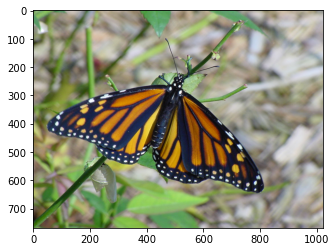

In [17]:
plt.imshow(plt.imread("C:/Users/Lenovo/Desktop/AIML Hackathon/leedsbutterfly/images/0010001.png"))
plt.show()

In [18]:
img_path = 'C:/Users/Lenovo/Desktop/AIML Hackathon/leedsbutterfly/images/0010001.png'
input_shape = (img_size, img_size, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)


In [19]:
test_img_features = model.predict(preprocessed_img, batch_size=1)

_, indices = neighbors.kneighbors(test_img_features)

1/1 [==============================] - 0s 107ms/step


(1, 5)


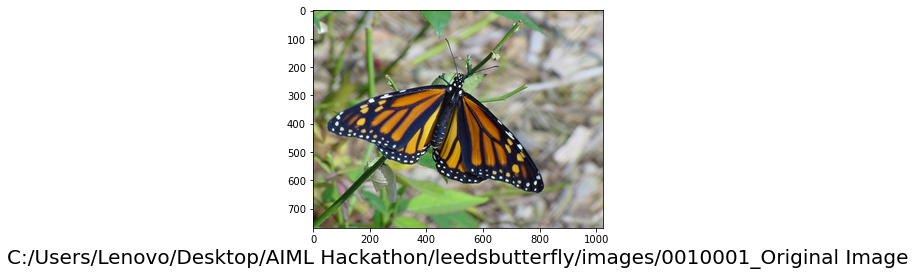

********* Predictions ***********


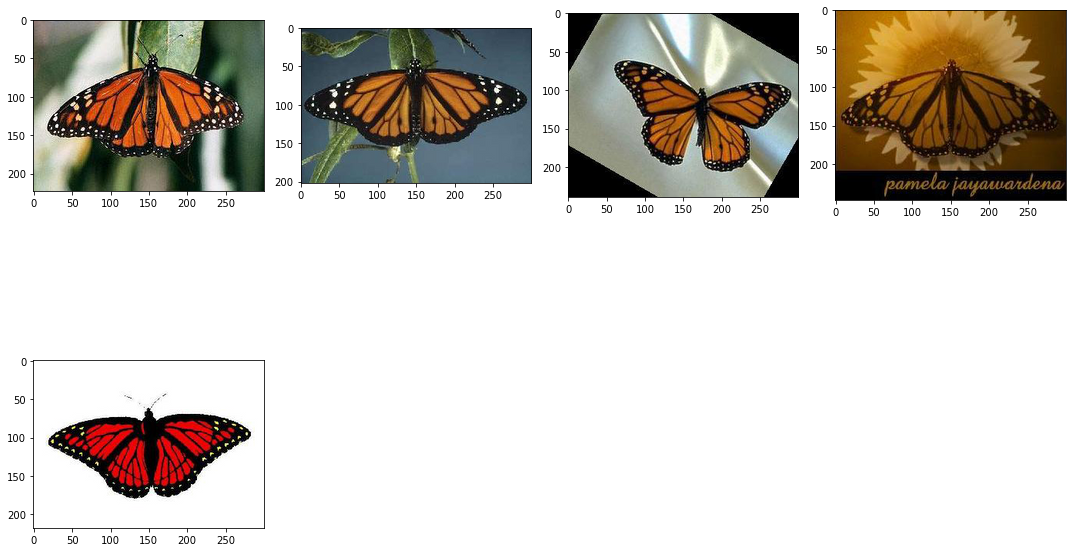

In [20]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

print(indices.shape)

plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions ***********')
similar_images(indices[0])

(1, 5)


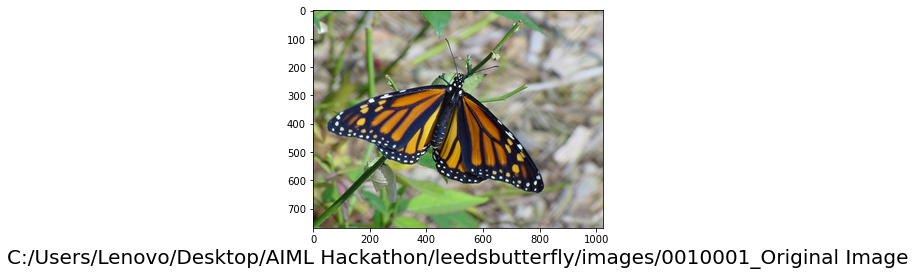

********* Predictions after PCA ***********


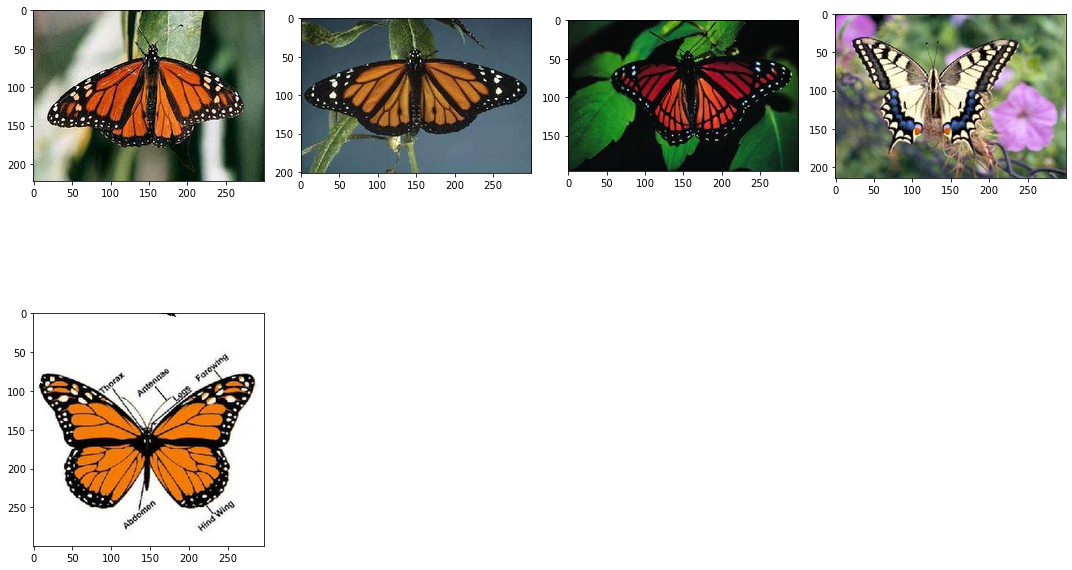

In [21]:
test_img_compressed = pca.transform(test_img_features)
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)
print(indices.shape)
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions after PCA ***********')
similar_images(indices[0])